# Experiment No. 09

Importing the required Libraries

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

Link to Dataset [Dataset](https://drive.google.com/file/d/1YfZAREEWTXN6xZ2_UfT_rH8ugVL5Ez3O/view?usp=drive_link)

In [ ]:
df=pd.read_csv("./inks.csv")
df

,product_name,product_price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product
...,...,...,...,...,...
1808,"Crompton 75 L Desert Air Cooler??????(White, T...",9999,5,fabulous!,good
1809,"Crompton 75 L Desert Air Cooler??????(White, T...",9999,1,don't waste your money,wheels are not connected properly screws are c...
1810,"Crompton 75 L Desert Air Cooler??????(White, T...",9999,5,terrific,its too good
1811,"Crompton 75 L Desert Air Cooler??????(White, T...",9999,5,excellent,excellent


## Analyzing the Sentiments

In [ ]:
def get_sentiment_analysis(comment:str)->str:
    analysis=TextBlob(comment)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity ==0:
        return "Neutral"
    return "Negative"


In [ ]:
data={"product_name":[],"sentiment":[],"summary":[]}

In [ ]:
df.dropna(inplace=True)

In [ ]:
for i,row in df.iterrows():
    sentiment=get_sentiment_analysis(row["Summary"])
    data["product_name"].append(row["product_name"])
    data["sentiment"].append(sentiment)
    data["summary"].append(row["Summary"])


In [ ]:
newdf=pd.DataFrame(data)
newdf

,product_name,sentiment,summary
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,Positive,great cooler excellent air flow and for this p...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,Positive,best budget 2 fit cooler nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,Positive,the quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,Negative,very bad product its a only a fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,Positive,ok ok product
...,...,...,...
1808,"Crompton 75 L Desert Air Cooler??????(White, T...",Positive,good
1809,"Crompton 75 L Desert Air Cooler??????(White, T...",Negative,wheels are not connected properly screws are c...
1810,"Crompton 75 L Desert Air Cooler??????(White, T...",Positive,its too good
1811,"Crompton 75 L Desert Air Cooler??????(White, T...",Positive,excellent


## Visualizations

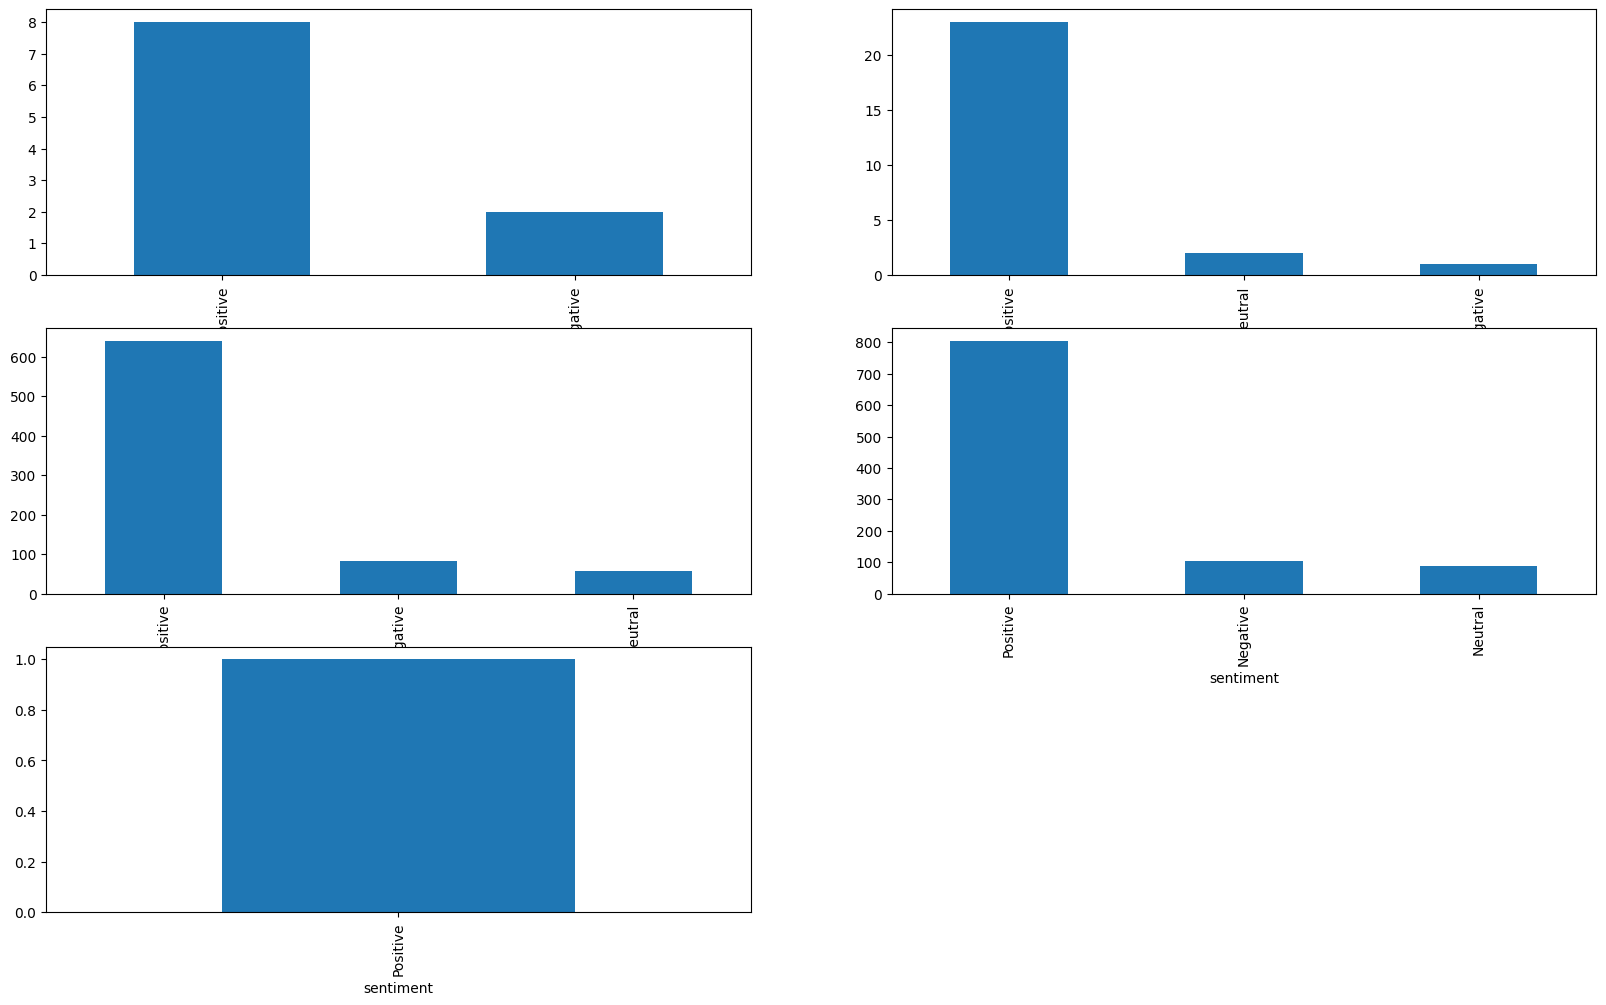

In [ ]:
plt.figure(figsize=(20,20))
for product_name in newdf["product_name"].unique():
    product_data=newdf[newdf["product_name"]==product_name]
    plt.subplot(len(list(newdf["product_name"].unique())),2,list(newdf["product_name"].unique()).index(product_name)+1)
    sentiments_count=product_data["sentiment"].value_counts().plot(kind="bar")